# Practical Business Analytics Week 4 Lab - Supervised Machine Learning

The lab from this week looks at the German credit scoring data and applies supervised machine learning methods to the data.

Work through the cells in this Jupyter Notebook, following the instructions in the text boxes to load and analyse the data.

Run the cell below to import the necessary libraries.

In [37]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, balanced_accuracy_score, matthews_corrcoef 
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold

## Reading in the data

First we will read in the data using the Pandas library. Use the cell below to load the data and display some of the data in a table under the cell.

```python
data = pd.read_csv("UCI-G.csv")
data
```

In [6]:
data = pd.read_csv("UCI-G.csv")
data

,Status,Checking,Duration,History,Purpose,Amount,Savings,Employment,PerCentIncome,PersonalStatus,...,ResidentYears,Property,Age,Plans,Housing,Credits,Job,Liability,Telephone,Foreign
0,2,lt0,15,NOtoCREDIT,CARtoNEW,950,lt100,8,4,MALEtoMARRIEDorWIDOWED,...,3,CARtoOTHER,33,NONE,RENT,2,SKILLEDtoEMPLOYEE,2,NONE,YES
1,2,lt0,12,NOtoCREDIT,CARtoNEW,1082,lt100,4,4,MALEtoMARRIEDorWIDOWED,...,4,CARtoOTHER,48,BANK,OWN,2,SKILLEDtoEMPLOYEE,1,NONE,YES
2,2,lt0,48,NOtoCREDIT,CARtoUSED,4605,lt100,8,3,MALEtoMARRIEDorWIDOWED,...,4,UNKNOWN,24,NONE,FREE,2,SKILLEDtoEMPLOYEE,2,NONE,YES
3,2,lt0,24,NOtoCREDIT,FURNITURE,4110,lt100,8,3,MALEtoMARRIEDorWIDOWED,...,4,UNKNOWN,23,BANK,RENT,2,SKILLEDtoEMPLOYEE,2,NONE,YES
4,2,lt0,18,NOtoCREDIT,FURNITURE,3114,lt100,1,1,FEMALEtoDIVORCEDtoMARRIED,...,4,SAVINGStoLIFEtoINSURANCE,26,NONE,RENT,1,SKILLEDtoEMPLOYEE,1,NONE,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,NONE,12,BADtoCREDIT,BUSINESS,1185,lt100,4,3,FEMALEtoDIVORCEDtoMARRIED,...,2,REALtoESTATE,27,NONE,OWN,2,SKILLEDtoEMPLOYEE,1,NONE,YES
996,1,NONE,36,BADtoCREDIT,BUSINESS,6304,UNKNOWN,8,4,MALEtoMARRIEDorWIDOWED,...,4,REALtoESTATE,36,NONE,OWN,2,SKILLEDtoEMPLOYEE,1,NONE,YES
997,1,NONE,48,BADtoCREDIT,BUSINESS,7629,UNKNOWN,8,4,MALEtoDIVORCED,...,2,CARtoOTHER,46,BANK,OWN,2,MANAGEMENTtoSELFEMPLOYED,2,NONE,YES
998,1,NONE,24,BADtoCREDIT,BUSINESS,4526,lt100,4,3,MALEtoMARRIEDorWIDOWED,...,2,REALtoESTATE,74,NONE,OWN,1,MANAGEMENTtoSELFEMPLOYED,1,YES,YES


You can see that in the data we have loaded, some of the columns contain numeric data, but others are categorical variables, taking one of a set of possible values. For example the "History" column contains one of several possible values, rather than a numeric entry.

To allow the classifiers to work with this data, we will transform it to a *one-hot* encoding. This replaces each single column categorical variable with multiple columns, representing the presence or absence of each possible value of the variable.

With Pandas we can do this using the *get_dummies()* function. Do this below, and look at the DataFrame to see how it has been encoded.

```Python
data_one_hot = pd.get_dummies(data,drop_first=True)
```

In [9]:
data_one_hot = pd.get_dummies(data,drop_first=True)
data_one_hot

,Status,Duration,Amount,Employment,PerCentIncome,ResidentYears,Age,Credits,Liability,Checking_NONE,...,Property_UNKNOWN,Plans_NONE,Plans_STORES,Housing_OWN,Housing_RENT,Job_SKILLEDtoEMPLOYEE,Job_UNSKILLEDtoNONtoRESIDENT,Job_UNSKILLEDtoRESIDENT,Telephone_YES,Foreign_YES
0,2,15,950,8,4,3,33,2,2,False,...,False,True,False,False,True,True,False,False,False,True
1,2,12,1082,4,4,4,48,2,1,False,...,False,False,False,True,False,True,False,False,False,True
2,2,48,4605,8,3,4,24,2,2,False,...,True,True,False,False,False,True,False,False,False,True
3,2,24,4110,8,3,4,23,2,2,False,...,True,False,False,False,True,True,False,False,False,True
4,2,18,3114,1,1,4,26,1,1,False,...,False,True,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,12,1185,4,3,2,27,2,1,True,...,False,True,False,True,False,True,False,False,False,True
996,1,36,6304,8,4,4,36,2,1,True,...,False,True,False,True,False,True,False,False,False,True
997,1,48,7629,8,4,2,46,2,2,True,...,False,False,False,True,False,False,False,False,False,True
998,1,24,4526,4,3,2,74,1,1,True,...,False,True,False,True,False,False,False,False,True,True


Now we want to split the data into the input features (which we will call X) and the target we are trying to predict, y. We can use Pandas to select the output field we are trying to predict, and drop it from the data to give X.

```python
output_field = "Status" # name of target column
X = data_one_hot.drop(output_field,axis=1)
y = data_one_hot[output_field]
```

In [11]:
output_field = "Status"
X = data_one_hot.drop(output_field,axis=1 )
y = data_one_hot[output_field]

Before we apply our first model to the data, we will split the data into a training and testing set, so that we can evaluate the model on data not used in training.

```python
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
```

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Decision Trees

A Decision Tree is a graphical representation of a tree used to make a decision. A decision tree classifier uses inductive learning on a **training** dataset by creating a tree structure which attempts to separate the classes into mutually exclusive subgroups at each node in the tree. Each child node is split based on the value of a field that best separates the training records at that point. The process recursively creates child nodes until there is no split that makes a difference, or the number of records represented by the node is too small.

Once created, to make a prediction, the decision tree performs a comparison, using field values at each node of the tree and then branches to either the left or the right based on the result.

A decision tree consists of:

 - A set of nodes, which are either non-terminal (internal) or terminal (leaf). The tree starts with a single root node and every possible path eventually leads to a leaf node.
 - A set of decision functions with one associated with each internal node.
 - Every leaf node has an associated class label that classifies the data record, that traverses a path from the root node at the top of the tree to that leaf node; that is each leaf node has a propensity for an output class based on the class distribution of the training subset associated with that node.

A benefit of this method is that the generated decision tree can be viewed as rules in a similar form to that in expert systems, which are English-like and are explicable. Every classification is easily understood as a rule generated by the path from the root node to the leaf.

Using *scikit-learn* we can create a decision tree classifier using

```python
decision_tree = DecisionTreeClassifier()
```

We can then fit it to some training data using:

```python
decision_tree = decision_tree.fit(X_train, y_train)
```

Do this below with the training data we created previously. You will not yet see any output when you run the code cell.

In [14]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train,y_train)

The decision_tree object we created above is a Python object that can be fit to training data, and also used to make predictions and score the model. When the object is fit to some data, the object stores internally the parameters of the model.

You can read about the decision tree object and the methods it provides here:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

Now we can visualise the tree to see the rules that have been created. The tree is quite large, so we restrict to only showing the first two levels of the tree:

```python
plot_tree(decision_tree,max_depth=1,feature_names=X.columns)
```

Try this below.

[Text(0.5, 0.8333333333333334, 'Checking_NONE <= 0.5\ngini = 0.42\nsamples = 700\nvalue = [490.0, 210.0]'),
 Text(0.25, 0.5, 'Duration <= 25.5\ngini = 0.486\nsamples = 424\nvalue = [248, 176]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'Plans_NONE <= 0.5\ngini = 0.216\nsamples = 276\nvalue = [242, 34]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

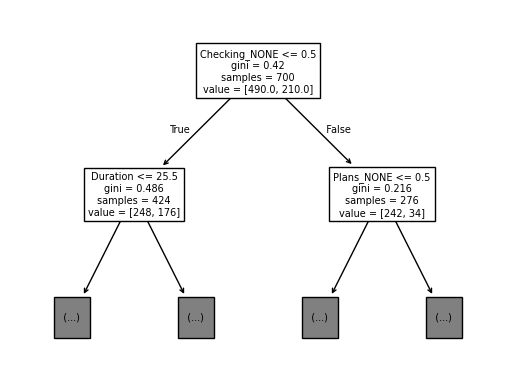

In [17]:
plot_tree(decision_tree,max_depth=1,feature_names=X.columns)

The simplest way to test the performance of our decision tree is to use the score method of the decision_tree object on some testing data.

```python
decision_tree.score(X_test,y_test)
```

For decision trees this will return the accuracy of the classifier.

In [18]:
decision_tree.score(X_test,y_test)

0.6966666666666667

However we may want to calculate more metrics for our classifier on the testing data. Write a Python function to calculate the following metrics, given a classifier model and a set of training and testing data.

For a *scikit-learn* Python object corresponding to a model, you can use the *predict()* method of the object to predict the outputs for a given set of input testing data.

You can use the code below as a template:

```python
def evaluate_classifier(model,X_test,y_test):
    y_pred = model.predict(X_test)
    b_acc = balanced_accuracy_score(y_test,y_pred)
    ...
    return { "Balanced accuracy":b_acc, "Precision":... }
```

Do this for the following scoring functions from *scikit-learn*:

```python
balanced_accuracy_score()
precision_score()
recall_score()
matthews_corrcoef()
roc_auc_score()
```

In [21]:
def evaluate_classifier(model,X_test,y_test):
    y_pred = model.predict(X_test)
    b_acc = balanced_accuracy_score(y_test,y_pred)
    p_score = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)
    mcc = matthews_corrcoef(y_test,y_pred)
    return { "Balanced accuracy": b_acc, "Precision": p_score, "Recall": recall, "ROC AUC": roc, "MCC": mcc }

# Preprocessing data

We have so far used the data without processing the numeric values. For the other machine learning models we will apply, it is important to scale the data before using it to train the model.

To do this we can use the scikit-learn MinMaxScaler class. This will scale numeric values so that they are in the range $[0,1]$. The scaler object has a method *fit_transform()* which will both fit the scaler to the data, and transform the data to be in the appropriate range.

```python
# Build a list of the numeric columns
numeric = ((X.dtypes==np.int64) | (X.dtypes==np.float64 ))
numeric_columns = list(numeric.index[numeric==True])
# Make a copy of the data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
# Scale the data
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled[numeric_columns] = min_max_scaler.fit_transform(X_train_scaled[numeric_columns])
X_test_scaled[numeric_columns] = min_max_scaler.fit_transform(X_test_scaled[numeric_columns])
```

It is important we only apply the scaler to the numerical columns of the data, not the encoded categorical variables. We do this by selecting only the numeric columns when we apply the scaler.

Do this below.

In [28]:
numeric = ((X.dtypes == np.int64) | (X.dtypes==np.float64))
numeric_columns = list(numeric.index[numeric== True])

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled[numeric_columns] = min_max_scaler.fit_transform(X_train_scaled[numeric_columns])
X_test_scaled[numeric_columns] = min_max_scaler.fit_transform(X_test_scaled[numeric_columns])

# Comparing models - neural networks and random forests

Now we will also apply several other models to the data and evaluate their performance. In *scikit-learn* we can take a shortcut to save us from having to write the same code to train and evaluate the models for each model. Since the models are Python objects, we can write functions or code that will work with any model.

First we can create models as Python objects for each of the methods we would like to use.

```python
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
neural_network = MLPClassifier(solver='lbfgs', alpha=1e-5,
                               hidden_layer_sizes=(10,10),max_iter=3000)
deep_nn = MLPClassifier(solver='adam', alpha=1e-5,
                        hidden_layer_sizes=(50,50,50,50,20,10),,max_iter=3000)
```

Do this below.

In [22]:
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
neural_network = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,10),max_iter=3000)
deep_nn = MLPClassifier(solver='adam',alpha=1e-5, hidden_layer_sizes=(50,50,50,50,20,10), max_iter=3000)

Now create a Python dictionary, with one entry for each model we are going to use. You can construct a dictionary using curly brackets, and providing a name for each key:

```python
a = { "key":value }
```

You should build the dictionary with the key as the name of the model (e.g. *"Neural network"*) and the value as the corresponding Python object we created in the previous cell.

In [25]:
models = {"dt":decision_tree, "rt":random_forest, "nn":neural_network, "dnn":deep_nn}

Now we can write a loop to iterate over the models and train and evaluate them. Use the for loop below as a template to construct a loop to train and evaluate each model.

```python
# Assuming our dictionary is stored in the variable models
for model_name,model in models.items(): # Loop over each (key,value) pair in our dictionary
    model = ... # Train the model using the fit method of the model, and the scaled training data
    metrics = ... # Use the evaluate_classifier function we wrote previously to evaluate the model on the test data
    print(model_name,metrics) # Print the model and the metrics
```

In [30]:
for model_name,model in models.items():
    model = model.fit(X_train_scaled,y_train)
    metrics = evaluate_classifier(model,X_test_scaled,y_test)
    print(model_name,metrics)

dt {'Balanced accuracy': np.float64(0.65), 'Precision': np.float64(0.7887323943661971), 'Recall': np.float64(0.8), 'ROC AUC': np.float64(0.6500000000000001), 'MCC': np.float64(0.3029721639077798)}
rt {'Balanced accuracy': np.float64(0.6492063492063492), 'Precision': np.float64(0.7764227642276422), 'Recall': np.float64(0.9095238095238095), 'ROC AUC': np.float64(0.6492063492063492), 'MCC': np.float64(0.35594571444196504)}
nn {'Balanced accuracy': np.float64(0.6698412698412699), 'Precision': np.float64(0.7981651376146789), 'Recall': np.float64(0.8285714285714286), 'ROC AUC': np.float64(0.6698412698412698), 'MCC': np.float64(0.3492761674812508)}
dnn {'Balanced accuracy': np.float64(0.6523809523809524), 'Precision': np.float64(0.7857142857142857), 'Recall': np.float64(0.8380952380952381), 'ROC AUC': np.float64(0.6523809523809525), 'MCC': np.float64(0.3211151353994379)}


# Cross validation

Rather than only taking a single split of the data into training and testing subsets, we can apply cross validation to consider performance over multiple train/test splits of the data. For k-fold cross validation the data are split into a proportion of $1/k$ testing data and $(k-1)/k$ training data. So for example in 5-fold cross validation the data are split into $4/5$ training data and $1/5$ testing data. This is then repeated for another 5 splits of the data in the same proportions.

When doing this for a classifier, we want to ensure the proportion of each class is the same in each of the training and test data sets. To do this we can use stratified cross validation. This first splits the data into groups, one for each class, and then takes an appropriate fraction of each class to construct the $k$ train/test data sets in each fold of the cross validation.

To implement this in *scikit-learn* we can make use of *pipelines*. Rather than having to write a loop over all of the $k$ folds in the cross validation, which also scales the data before training, we can construct a pipeline that applies scaling and then applies the classifier model.

For example to create a classifier pipeline with a decision tree, we can construct a pipeline as:

```python
pipe = Pipeline([
        ('scale', preprocessing.MinMaxScaler()),
        ('clf', DecisionTreeClassifier())])
```

Try doing this below, and then using the *pipe* pipeline object to train and evaluate on the unscaled training and test data we used above, using the *fit()* method of *pipe*, and the *evaluate_classifier()* function we created.

In [31]:
pipe = Pipeline([
    ('scale', preprocessing.MinMaxScaler()),
    ('clf', DecisionTreeClassifier())
])

In [32]:
pipe.fit(X_train,y_train)
evaluate_classifier(pipe,X_test,y_test)

{'Balanced accuracy': np.float64(0.6341269841269841),
 'Precision': np.float64(0.7793427230046949),
 'Recall': np.float64(0.7904761904761904),
 'ROC AUC': np.float64(0.6341269841269841),
 'MCC': np.float64(0.27091161746251213)}

To perform cross validation we can use the *cross_validate* function, and apply a stratified K fold cross validation. When using the *cross_validate* function it is possible to include a list of scores we would like to calculate for each fold of the cross validation.

```python
scores = ["accuracy",'precision', 'recall',"matthews_corrcoef","roc_auc"]
cross_validate(model,X,y,cv=StratifiedKFold(n_splits=5,shuffle=True),scoring=scores)
```

Try this below with $10$ splits of the data, and using our *pipe* pipeline we created as the model.

In [38]:
scores = ["accuracy",'precision', 'recall',"matthews_corrcoef","roc_auc"]
cross_validate(model,X,y,cv=StratifiedKFold(n_splits=10,shuffle=True),scoring=scores)


{'fit_time': array([0.18058109, 0.08675408, 0.09746599, 0.09439516, 0.08845901]),
 'score_time': array([0.007231  , 0.00436687, 0.0049541 , 0.00457382, 0.00428104]),
 'test_accuracy': array([0.565, 0.7  , 0.71 , 0.65 , 0.71 ]),
 'test_precision': array([0.70229008, 0.7       , 0.70918367, 0.72435897, 0.70707071]),
 'test_recall': array([0.65714286, 1.        , 0.99285714, 0.80714286, 1.        ]),
 'test_matthews_corrcoef': array([0.00688575, 0.        , 0.14028293, 0.10008876, 0.15352206]),
 'test_roc_auc': array([0.50869048, 0.46714286, 0.70714286, 0.61333333, 0.61178571])}

The cross validate function returns a dictionary, with an array of cross validation scores for each metric that was calculated. Typically we would take the average of these to use as the final score. To do this we can use the numpy *np.mean()* function to calculate the average of each array.

Write a Python function that can take as input a *scikit-learn* model, and X and y data, and perform 5-fold cross validation and return a dictionary with each of the average scores. You can ignore the 'fit_time' and 'score_time' entries in the dictionary (although it may be easiest to still calculate the average of these).

In [39]:
def wde(model,X,y):
    scores = ["accuracy",'precision', 'recall',"matthews_corrcoef","roc_auc"]
    metrics = cross_validate(model,X,y,cv=StratifiedKFold(n_splits=10,shuffle=True),scoring=scores)
    return { k : np.mean(vals) for k,vals in metrics.items() } 



Now try applying your function to the *pipe* pipeline we created above, and the original X and y data, (before we split it into training and test data) to give the average performance across each of the cross validation folds.

In [40]:
wde(pipe,X,y)

{'fit_time': np.float64(0.006128787994384766),
 'score_time': np.float64(0.004470562934875489),
 'test_accuracy': np.float64(0.674),
 'test_precision': np.float64(0.7736691668047161),
 'test_recall': np.float64(0.7571428571428571),
 'test_matthews_corrcoef': np.float64(0.23411408690256988),
 'test_roc_auc': np.float64(0.6185714285714285)}

Next write a loop that iterates over all of the models in our model dictionary, constructs a pipeline, and uses cross validation to evaluate the model.

```python
# Assuming our dictionary is stored in the variable models
for model_name,model in models.items(): # Loop over each (key,value) pair in our dictionary
    model_pipeline = ... # create a pipeline for the model
    metrics = cross_eval(model_pipeline,X,y) # Use the cross_eval function we wrote previously to evaluate the model
    print(model_name,metrics) # Print the model and the metrics
```

Remember we can create a pipeline with scaling using:

```python
pipe = Pipeline([('scale', preprocessing.MinMaxScaler()),('name', model)])
```

where we are passing the pipeline constructor a list of pairs of names and *scikit-learn* objects. The first object above is a scaler, and the second is then the model used for classification.

In [45]:
for model_name,model in models.items():

    model_pipeline = Pipeline([('scale', preprocessing.MinMaxScaler()),(model_name, model)])
    metrics = wde(model_pipeline,X,y)
    print(model_name,metrics)

dt {'fit_time': np.float64(0.006806015968322754), 'score_time': np.float64(0.004789471626281738), 'test_accuracy': np.float64(0.707), 'test_precision': np.float64(0.7905813287858238), 'test_recall': np.float64(0.7928571428571429), 'test_matthews_corrcoef': np.float64(0.29948905090681793), 'test_roc_auc': np.float64(0.6497619047619048)}
rt {'fit_time': np.float64(0.08909828662872314), 'score_time': np.float64(0.009491777420043946), 'test_accuracy': np.float64(0.753), 'test_precision': np.float64(0.7759209016662922), 'test_recall': np.float64(0.9100000000000001), 'test_matthews_corrcoef': np.float64(0.3562760802990318), 'test_roc_auc': np.float64(0.7903809523809524)}
nn {'fit_time': np.float64(0.2648211240768433), 'score_time': np.float64(0.004612493515014649), 'test_accuracy': np.float64(0.716), 'test_precision': np.float64(0.7936317263147217), 'test_recall': np.float64(0.8028571428571428), 'test_matthews_corrcoef': np.float64(0.3204743378565101), 'test_roc_auc': np.float64(0.6943333333

Finally we can write a loop that evaluates each model and stores the results in a Pandas DataFrame. To do this we can construct a list of Python dictionaries. Each dictionary contains the metrics, along with the name of the model. Passing this to Pandas will produce a table with the name of the model and the corresponding metrics along each row.

Adapt your code from the previous cell, using the template below for reference:

```python
m = [] # Create an empty list
for model_name,model in models.items(): # Loop over each (key,value) pair in our dictionary
    ... # Generate the metrics for the model
    metrics["name"] = model_name # Set the name of the model
    m.append(metrics) # Append it to the list
pd.DataFrame(m) # Create a DataFrame from the list
```


In [52]:
m = []
for model_name, model in models.items():
    model_pipeline = Pipeline([('scale', preprocessing.MinMaxScaler()),(model_name, model)]) # create a pipeline for the model
    metrics = wde(model_pipeline,X,y)
    metrics["name"] = model_name
    m.append(metrics)
    pd.DataFrame(m)

print(pd.DataFrame(m))


   fit_time  score_time  test_accuracy  test_precision  test_recall  \
0  0.006677    0.004598          0.703        0.781676     0.802857   
1  0.086196    0.009049          0.757        0.773638     0.922857   
2  0.271326    0.004415          0.691        0.784261     0.778571   
3  0.475846    0.004491          0.697        0.781335     0.790000   

   test_matthews_corrcoef  test_roc_auc name  
0                0.279347      0.636429   dt  
1                0.364146      0.792333   rt  
2                0.265189      0.666119   nn  
3                0.272400      0.692810  dnn  


Once you have completed this, you can try performing the same analysis on the *wholsale.csv* data, and then the *zoocust.csv* data.

For the *wholesale.csv* data, try to predict the "Channel" column with the classifier. For the *zoocust1.csv* data, try to predict the "churned" column.